In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing,cross_validation,model_selection

C:\Users\avijit saha\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#loading the dataset
url="http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
name=['Id','Clump Thickness','Uniform Cell Size','Uniform Cell Shape','Marginal Adhesion',
      'Signle Epithelial Size','Bare Nuclei','Bland Chromatin',
      'Normal Nucleoli','Mitoses','Class']
df=pd.read_csv(url,names=name)

In [3]:
df.head(5)

,Id,Clump Thickness,Uniform Cell Size,Uniform Cell Shape,Marginal Adhesion,Signle Epithelial Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# Preprocess the data
df.replace('?',-99999,inplace=True)
df.drop(['Id'],1,inplace=True)
print(df.axes)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index([u'Clump Thickness', u'Uniform Cell Size', u'Uniform Cell Shape',
       u'Marginal Adhesion', u'Signle Epithelial Size', u'Bare Nuclei',
       u'Bland Chromatin', u'Normal Nucleoli', u'Mitoses', u'Class'],
      dtype='object')]
(699, 10)


In [5]:
df.describe()

,Clump Thickness,Uniform Cell Size,Uniform Cell Shape,Marginal Adhesion,Signle Epithelial Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


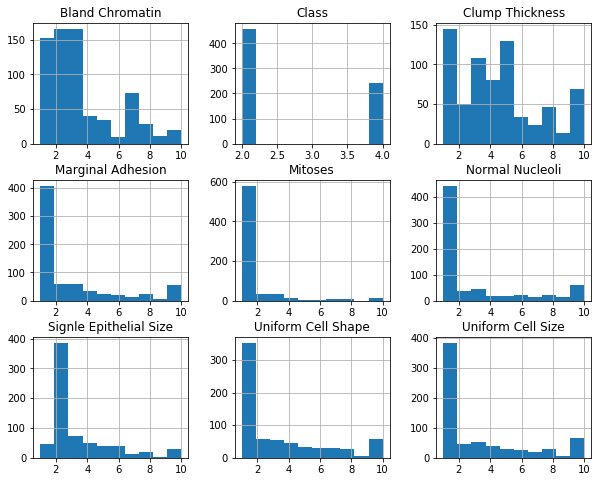

In [6]:
#plotting histogram for each variable
df.hist(figsize=(10,8))
plt.show()

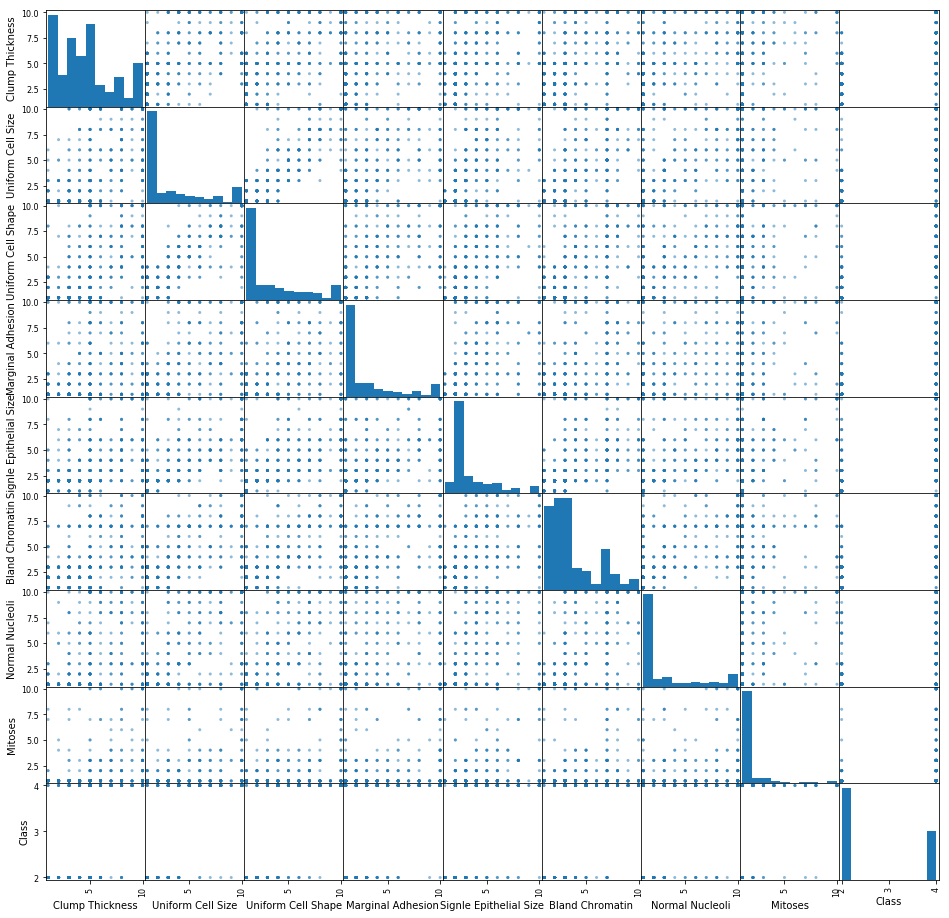

In [7]:
#creating scatter plot matrix
scatter_matrix(df, figsize=(16,16))
plt.show()

In [8]:
#create datasets for training
X=np.array(df.drop(['Class'],1))
y=np.array(df['Class'])

X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2)

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
knn=KNeighborsClassifier()

In [10]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(np.round(k_scores,4))

[0.957  0.941  0.9606 0.9606 0.9696 0.957  0.9642 0.9606 0.9624 0.9588
 0.9624 0.9588 0.9606 0.9624 0.9606 0.9588 0.9588 0.9606 0.9606 0.9606
 0.9606 0.9606 0.9606 0.9606 0.9606 0.9606 0.9606 0.9588 0.9588 0.9588
 0.9588 0.9588 0.9588 0.9588 0.9588 0.9588 0.9588 0.9588 0.9588 0.9588
 0.9588 0.957  0.9588 0.9553 0.9588 0.9553 0.957  0.9553 0.9553]


In [11]:
from sklearn.model_selection import GridSearchCV
k_range=list(range(1,50))
parameters=dict(n_neighbors=k_range)
clf_knn=GridSearchCV(knn,parameters,cv=10,scoring='accuracy')
print("Tuning Hyper-Parameters for accuracy" )
clf_knn.fit(X_train,y_train)
print(clf_knn.best_params_)
print(np.round(clf_knn.best_score_,3))

from sklearn.metrics import accuracy_score,classification_report
pred=clf_knn.predict(X_test)
print("Accuracy_score: ", accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Tuning Hyper-Parameters for accuracy
{'n_neighbors': 5}
0.97
('Accuracy_score: ', 0.9785714285714285)
             precision    recall  f1-score   support

          2       0.98      0.99      0.98        90
          4       0.98      0.96      0.97        50

avg / total       0.98      0.98      0.98       140



# SVM

In [12]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
clf=SVC()
Cs = [0.001, 0.01, 0.1, 1, 10,100,1000]
gammas = [0.001, 0.01, 0.1, 1,10,100,1000]
parameters=[{'kernel':['rbf'],'C':Cs,'gamma':gammas},{'kernel':['linear'],'C':Cs}]
clf_svm=GridSearchCV(clf,parameters,cv=10,scoring="accuracy")
print("Tuning Hyper-Parameters for accuracy")
clf_svm.fit(X_train,y_train)
print(clf_svm.best_params_)
print(np.round(clf_svm.best_score_,3))

predictions=clf_svm.predict(X_test)
print("Accuracy_score: ",accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

Tuning Hyper-Parameters for accuracy
{'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.971
('Accuracy_score: ', 0.95)
             precision    recall  f1-score   support

          2       0.98      0.94      0.96        90
          4       0.91      0.96      0.93        50

avg / total       0.95      0.95      0.95       140



# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
clf_rf=RandomForestClassifier()
param_grid = {"n_estimators": np.arange(10,100,5),
              "min_samples_split": np.arange(2,100,2),
              "criterion": ["gini", "entropy"]
              }
grid_rf=GridSearchCV(clf_rf,param_grid,cv=10,scoring='accuracy')
print("Tuning Hyper-Parameters for accuracy")
grid_rf.fit(X_train,y_train)
print(grid_rf.best_params_)
print(np.round(grid_rf.best_score_,3))

prediction=grid_rf.predict(X_test)
print("Accuracy_score: ",accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

Tuning Hyper-Parameters for accuracy
{'min_samples_split': 32, 'n_estimators': 30, 'criterion': 'gini'}
0.977
('Accuracy_score: ', 0.9571428571428572)
             precision    recall  f1-score   support

          2       1.00      0.93      0.97        90
          4       0.89      1.00      0.94        50

avg / total       0.96      0.96      0.96       140

